In [2]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt 

np.random.seed(0)

datapath = "./"

In [3]:
csvname = datapath + '2d_span_data.csv'
x = np.loadtxt(csvname, delimiter = ',')

print(np.shape(x)) # (2, 50)

(2, 50)


In [38]:
import os
os.getcwd()

'/mnt/c/Users/jianhuang/OneDrive - alumni.hust.edu.cn/UMass/UMass_fourth_year/homework/hw6'

In [22]:
def cengter(x):
    standardized_x = (x.T - x.mean(axis=1)).T
    return standardized_x

def compute_pcs(x, lam):
    p = float(x.shape[1])
    cov = 1/p * np.dot(x, x.T) + lam*np.eye(x.shape[0]) # adding lam to prevent numerical stability
    D, V = np.linalg.eigh(cov)
    return D, V

def pca_transform_data(x, **kwargs):
    num_components = x.shape[0]
    if 'num_components' in kwargs:
        num_components = kwargs["num_components"]
    lam = 1e-7
    if "lam" in kwargs:
        lam = kwargs["lam"]
    
    D, V = compute_pcs(x, lam)
    V = V[:, -num_components:]
    D = D[-num_components:]
    
    # compute transformed data for PC space
    w = np.dot(V.T, x)
    return w, V

In [7]:
np.mean(x, axis=1)[:,np.newaxis].shape

(2, 1)

In [24]:
standardized_x = cengter(x)
kwargs = {'num_components':2, 'lam':1e-7}
w, V = pca_transform_data(standardized_x, **kwargs)

In [25]:
w

array([[ 0.62413791, -0.71146955,  0.75131154, -0.82365708, -0.82046788,
        -1.92998386,  0.79233381, -0.19707167,  0.70483666, -0.40446228,
         0.36309697, -0.1745813 ,  0.77715611, -0.60765721,  0.3632076 ,
        -0.07927162, -0.80167456,  0.99623133, -0.23414997, -0.72975976,
        -0.61392303, -0.95393801,  0.94439822,  0.63084535, -0.27070721,
         1.20581086, -0.74084884, -0.84433767,  0.49383769, -2.04797806,
         0.69834702,  1.33311009,  0.49775188,  0.68215737,  1.00781778,
         0.66993721,  1.44321825, -0.12646139, -0.64903317, -0.44084681,
        -1.09302281,  0.23439927, -1.40137744, -0.40644612,  1.19448047,
        -2.31540458, -1.75983297,  0.97331605,  2.09588434,  1.70074108],
       [-0.29874213,  6.68628306,  3.43996721,  4.1474337 ,  0.9861714 ,
         0.56095111, -8.08252901, -2.59232833,  5.77966532, -6.15008736,
         4.09805182, -0.6483315 ,  4.10293648,  0.10109542,  1.94829311,
        -0.57960744, -0.4670246 ,  0.16355586,  8.

In [23]:
import matplotlib.pyplot as plt

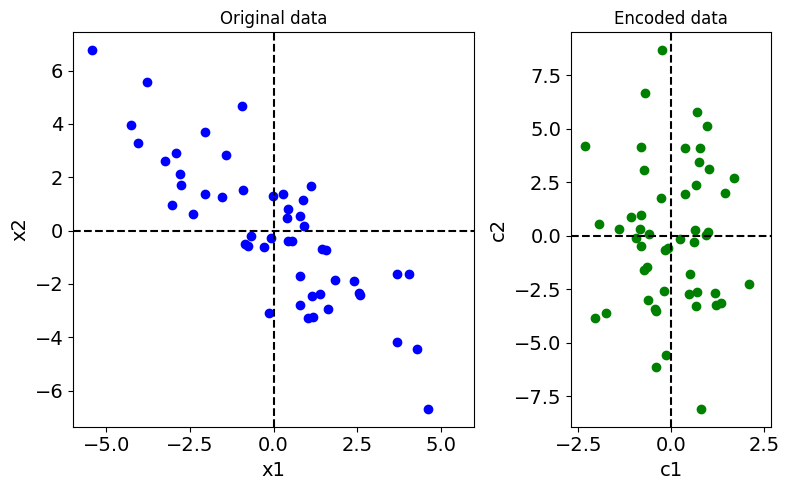

In [37]:
fig, axs = plt.subplots(1,2,figsize=(8,5), gridspec_kw={'width_ratios':[2,1]})
axs[0].plot(standardized_x[0], standardized_x[1], "bo")
axs[0].set_xticks([-5,-2.5,0,2.5,5])
axs[0].set_xlim([-6, 6])
axs[0].set_xlabel("x1", fontsize=14)
axs[0].set_ylabel("x2", fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].axhline(y = 0, color = 'k', linestyle = '--')
axs[0].axvline(x = 0, color = 'k', linestyle = '--')
axs[0].set_title("Original data")

axs[1].plot(w[0], w[1], "go")
axs[1].set_xticks([-2.5,0,2.5])
axs[1].set_xlim([-2.7, 2.7])
axs[1].set_xlabel("c1", fontsize=14)
axs[1].set_ylabel("c2", fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].axhline(y = 0, color = 'k', linestyle = '--')
axs[1].axvline(x = 0, color = 'k', linestyle = '--')
axs[1].set_title("Encoded data")

plt.tight_layout()
plt.savefig("task1.png")
plt.show()
# axs[1].set_xlim([-2.7, 2.7])

# K-means

In [41]:
P = 50 # Number of data points
blobs = datasets.make_blobs(n_samples = P, centers = 3, random_state = 10)
data = np.transpose(blobs[0])
print(data.shape) # (2, 50)

(2, 50)


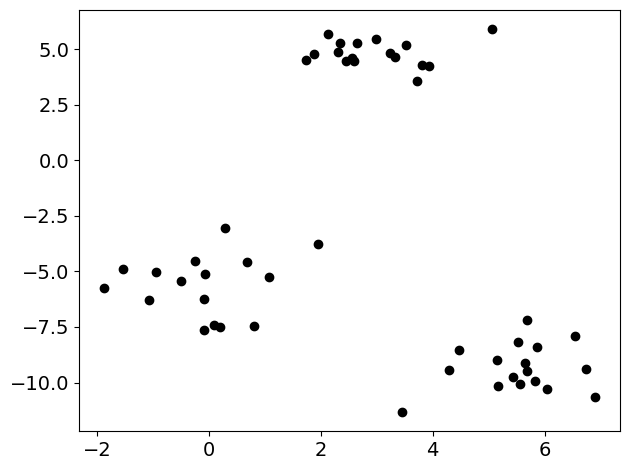

In [72]:
plt.plot(data[0], data[1], "ko")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

In [40]:
# k-means algorithm
def k_means(data, iterations, centroid_num):
    x1 = np.random.rand(1, centroid_num)
    x2 = np.random.rand(1, centroid_num)
    centroids_x1 = x1*( data[0].max() - data[0].min()  ) + data[0].min()
    centroids_x2 = x2*( data[1].max() - data[1].min()  ) + data[1].min()
    centroids = np.vstack([centroids_x1, centroids_x2])
    centroids_history = [centroids, ]
    # calculate average distance as the cost?
    cost_history = []
    for i in range(1, iterations+1):
        # determine classes
        # use numpy broadcasting
        # see: https://stackoverflow.com/questions/68185016/numpy-broadcasting-two-arrays-of-different-shape-to-matrix
        distances = np.linalg.norm(data.T - centroids.T.reshape(centroid_num,1,2), axis=2)
        
        index = distances.argmin(axis=0)
        
        new_cens = []
        dist_to_cens = 0
        for cen in range(centroid_num):
            tmp = data[:,index==cen]

            if tmp.size != 0:
                # print(type(tmp))
                new_cens.append(tmp.mean(axis=1))
            else: # maintain the same as previous ones
                new_cens.append(centroids[:,cen])
            # if empty?
            dist_to_cens += distances[:, index==cen][cen].sum()
        cost = dist_to_cens/data.shape[1]
        cost_history.append(cost)
        # update centroids
        centroids = np.array(new_cens).T
        centroids_history.append(centroids)
    return centroids_history, cost_history

In [79]:
distances = np.linalg.norm(data.T - centroids.T.reshape(3,1,2), axis=2)
print(distances)

[[ 8.09549461  8.9155098  15.21163216 10.06318641  9.49943657  8.76132356
  15.64661311 14.52156967 16.15152555 16.53051859  8.55043674  6.7177324
   7.24242726  0.74522358  1.29127392  3.32700261  7.44154404 16.96573585
   1.14383572  1.26381695  1.84300089 16.15816099  2.73462734  1.63219409
  16.51354256 15.93599203  9.27433087 15.15418431 16.62794235  1.55396495
   1.55779626  8.37285383  9.96275035  2.74556645  2.6998476   7.37020456
   3.0720007   2.28796275  7.79591683  2.42432598 16.1186691  15.86585425
   0.20474574  3.59924993  8.91925358 15.82022887  9.90472472 15.71771851
  15.65079642 16.42807356]
 [ 3.53221116  4.5124603  10.74240612  5.21623084  4.61270749  3.76287811
  11.08353986 10.0194265  11.63780485 11.79759906  3.32894696  2.82109218
   3.41002347  4.65063392  4.1828379   4.87048457  3.72180075 12.21168077
   4.21013541  4.41449902  3.48173218 11.33005043  2.71314428  4.06068954
  11.90307541 11.076042    4.16176714 10.71340253 12.458874    3.76912696
   3.8580949

In [118]:
index = distances.argmin(axis=0)
print(index)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 1 1 0 0 2 1 2 2 1 1 1 1 1 2 2 1 1 2 2 1 2
 2 1 2 1 1 0 2 1 1 1 1 1 1]


In [43]:
cen_hist, cost_hist = k_means(data, 50, 3)

In [45]:
distances = np.linalg.norm(data.T - cen_hist[-1].T.reshape(3,1,2), axis=2)
index = distances.argmin(axis=0)
print(index)

[0 0 2 0 0 0 2 2 2 2 0 0 0 1 1 1 0 2 1 1 1 2 1 1 2 2 0 2 2 1 1 0 0 1 1 0 1
 1 0 1 2 2 1 1 0 2 0 2 2 2]


## center number = 3

In [76]:
cen_hist, cost_hist = k_means(data, 20, 3)
distances = np.linalg.norm(data.T - cen_hist[-1].T.reshape(3,1,2), axis=2)
index = distances.argmin(axis=0)
print(index)

[2 2 0 2 2 2 0 0 0 0 2 2 2 1 1 1 2 0 1 1 1 0 1 1 0 0 2 0 0 1 1 2 2 1 1 2 1
 1 2 1 0 0 1 1 2 0 2 0 0 0]


In [57]:
color = np.where(index==0, 'g', np.where(index==1, 'b', np.where(index==2, 'y', 'k')))

In [58]:
color

array(['g', 'g', 'y', 'g', 'g', 'g', 'y', 'y', 'y', 'y', 'g', 'g', 'g',
       'b', 'b', 'b', 'g', 'y', 'b', 'b', 'b', 'y', 'b', 'b', 'y', 'y',
       'g', 'y', 'y', 'b', 'b', 'g', 'g', 'b', 'b', 'g', 'b', 'b', 'g',
       'b', 'y', 'y', 'b', 'b', 'g', 'y', 'g', 'y', 'y', 'y'], dtype='<U1')

[0 0 1 0 0 0 1 1 1 1 0 0 0 2 2 2 0 1 2 2 2 1 2 2 1 1 0 1 1 2 2 0 0 2 2 0 2
 2 0 2 1 1 2 2 0 1 0 1 1 1]


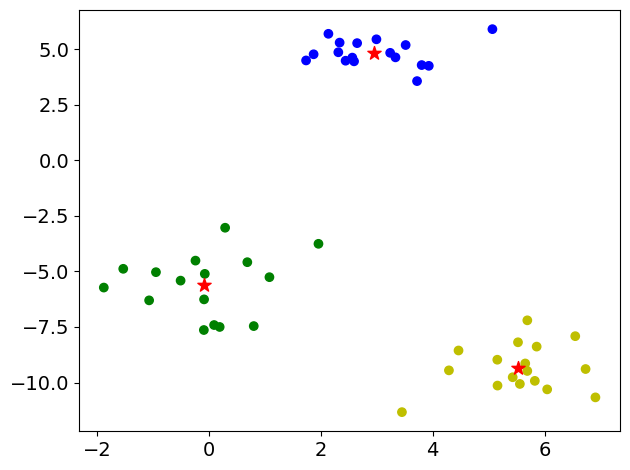

In [81]:
cen_hist, cost_hist = k_means(data, 30, 3)
distances = np.linalg.norm(data.T - cen_hist[-1].T.reshape(3,1,2), axis=2)
index = distances.argmin(axis=0)
print(index)
color = np.where(index==0, 'g', np.where(index==1, 'b', np.where(index==2, 'y', 'k')))
# color = np.where(x<1,'k',np.where(y<5,'b','r'))
plt.scatter(data[0], data[1], c=color)
plt.scatter(cen_hist[-1][0],cen_hist[-1][1], s=100, c='r', marker='*', label="Centroid")
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(frameon=True)
plt.tight_layout()
plt.savefig("task2-cennum3.png")
plt.show()

In [138]:
cost_hist[-1]

1.16996830066258

## center number = 1

In [187]:
cen_hist1, cost_hist1 = k_means(data, 50, 1)
cen_hist2, cost_hist2 = k_means(data, 50, 2)
cen_hist3, cost_hist3 = k_means(data, 50, 3)
cen_hist4, cost_hist4 = k_means(data, 50, 4)
cen_hist5, cost_hist5 = k_means(data, 50, 5)
cen_hist6, cost_hist6 = k_means(data, 50, 6)
cen_hist7, cost_hist7 = k_means(data, 50, 7)
cen_hist8, cost_hist8 = k_means(data, 50, 8)
cen_hist9, cost_hist9 = k_means(data, 50, 9)
cen_hist10, cost_hist10 = k_means(data, 50, 10)

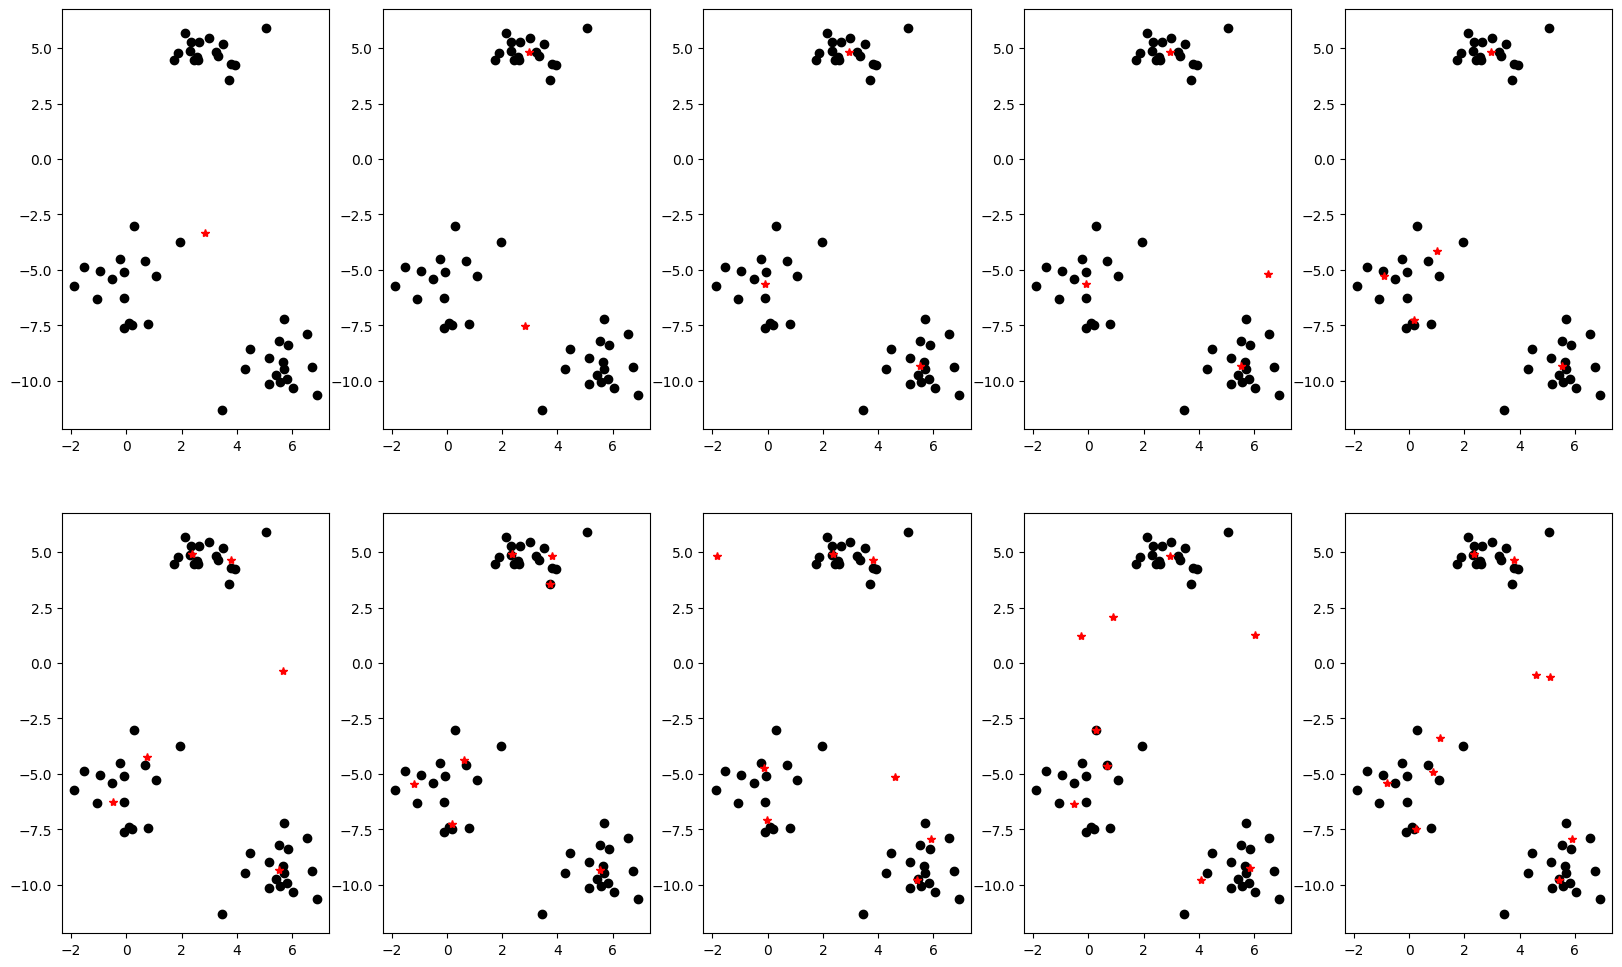

In [188]:
fig, ax = fig, ax = plt.subplots(2, 5, figsize=(20,12))
ax[0][0].plot(data[0], data[1], "ko")
ax[0][0].plot(cen_hist1[-1][0],cen_hist1[-1][1], "r*" )

ax[0][1].plot(data[0], data[1], "ko")
ax[0][1].plot(cen_hist2[-1][0],cen_hist2[-1][1], "r*" )

ax[0][2].plot(data[0], data[1], "ko")
ax[0][2].plot(cen_hist3[-1][0],cen_hist3[-1][1], "r*" )

ax[0][3].plot(data[0], data[1], "ko")
ax[0][3].plot(cen_hist4[-1][0],cen_hist4[-1][1], "r*" )

ax[0][4].plot(data[0], data[1], "ko")
ax[0][4].plot(cen_hist5[-1][0],cen_hist5[-1][1], "r*" )

ax[1][0].plot(data[0], data[1], "ko")
ax[1][0].plot(cen_hist6[-1][0],cen_hist6[-1][1], "r*" )

ax[1][1].plot(data[0], data[1], "ko")
ax[1][1].plot(cen_hist7[-1][0],cen_hist7[-1][1], "r*" )

ax[1][2].plot(data[0], data[1], "ko")
ax[1][2].plot(cen_hist8[-1][0],cen_hist8[-1][1], "r*" )

ax[1][3].plot(data[0], data[1], "ko")
ax[1][3].plot(cen_hist9[-1][0],cen_hist9[-1][1], "r*" )

ax[1][4].plot(data[0], data[1], "ko")
ax[1][4].plot(cen_hist10[-1][0],cen_hist10[-1][1], "r*" )
plt.show()

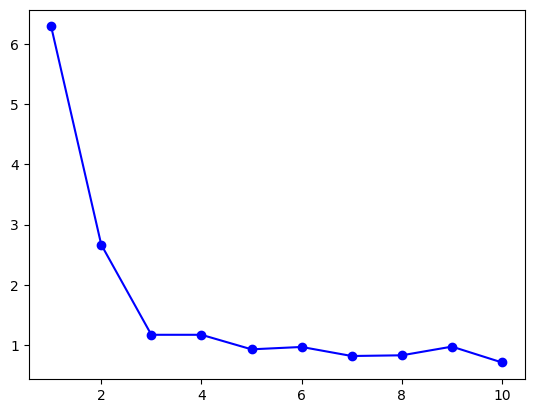

In [189]:
cost_arr = [cost_hist1[-1], cost_hist2[-1],cost_hist3[-1],
           cost_hist4[-1],cost_hist5[-1],cost_hist6[-1],
           cost_hist7[-1],cost_hist8[-1],cost_hist9[-1],
           cost_hist10[-1]]
plt.plot(np.arange(1,11,1), cost_arr, "bo-")

In [183]:
cost_hist1[-1]

6.292399536849287

In [83]:
final_cens = {}
for cen_num in range(1,11,1):
    # run each for 6 random trials <-- k-means method is sensitive to initialization
    cost_tmp = 100	# a large number, doesn't matter...
    for iter in range(10):
        cen_hist, cost_hist = k_means(data, 30, cen_num)
        if cost_hist[-1] < cost_tmp:
            cost_tmp = cost_hist[-1]
            cen_tmp = cen_hist[-1]
    final_cens[cen_num] = cen_tmp[-1], cost_tmp
print(final_cens)

{1: (array([-3.33621249]), 6.292399536849287), 2: (array([-7.53731933,  4.81887725]), 2.6673204855919574), 3: (array([-5.618137  ,  4.81887725, -9.34360857]), 1.16996830066258), 4: (array([-7.0940632 ,  4.81887725, -4.73258129, -9.34360857]), 1.015363386053378), 5: (array([ 4.81887725, -9.78154807, -6.24856431, -4.23119693, -7.92030519]), 0.9647452857160828), 6: (array([-4.88225314,  4.81887725, -8.04758154, -9.88361983, -4.73258129,
       -7.0940632 ]), 0.9144726236985318), 7: (array([ -4.31198362, -10.12243445,  -5.60318972,   4.81887725,
        -4.50938803,  -8.46742946,  -7.50108581]), 0.810826957522409), 8: (array([-3.81110699,  4.93139576, -9.78154807, -7.25246066, -4.50938803,
       -5.28384268,  4.65813651, -7.92030519]), 0.728794553850815), 9: (array([-5.40560735,  4.93139576,  1.9319414 , -4.16024751, -0.62209204,
       -7.50108581,  4.65813651, -9.81418143, -8.2142337 ]), 0.7453678130140398), 10: (array([-4.23119693, -9.77828146,  4.75171104,  5.89353659,  1.06089152,
  

In [86]:
[i[1][1] for i in final_cens.items()]

[6.292399536849287,
 2.6673204855919574,
 1.16996830066258,
 1.015363386053378,
 0.9647452857160828,
 0.9144726236985318,
 0.810826957522409,
 0.728794553850815,
 0.7453678130140398,
 0.7320361083492638]

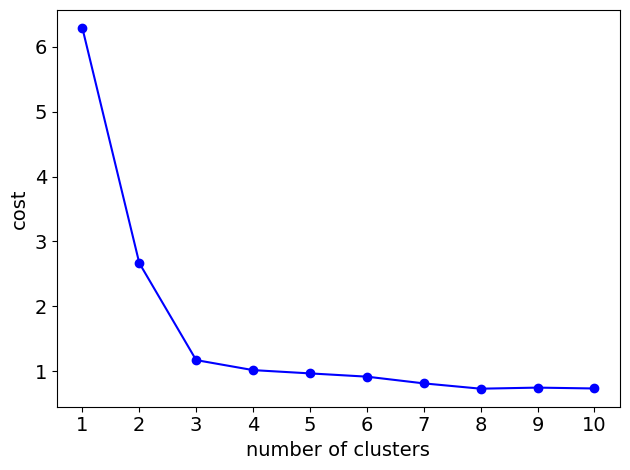

In [89]:
cost_arr = [i[1][1] for i in final_cens.items()]
plt.plot(np.arange(1,11,1), cost_arr, "bo-")
plt.xlabel("number of clusters", fontsize=14)
plt.xticks(np.arange(1,11,1))
plt.ylabel("cost", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()